In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("data.csv")
data.index=data.index+1
data

,i,xi
1,1,10.11
2,2,9.53
3,3,10.07
4,4,11.35
5,5,8.31
6,6,9.35
7,7,9.55
8,8,9.57
9,9,10.86
10,10,9.58


In [2]:
mu0=10
sigma=0.9
lambdaa=0.1
L=3
temp=0

In [3]:
new_z = [lambdaa*data['xi'].values[0]+(1-lambdaa)*mu0]
new_z

[10.011]

In [4]:
for j,k in zip(data.i, data.xi[1:30]):
    new_z.append(lambdaa*k+(1-lambdaa)*new_z[j-1])
data['z'] = new_z
data

,i,xi,z
1,1,10.11,10.011000
2,2,9.53,9.962900
3,3,10.07,9.973610
4,4,11.35,10.111249
5,5,8.31,9.931124
6,6,9.35,9.873012
7,7,9.55,9.840711
8,8,9.57,9.813639
9,9,10.86,9.918276
10,10,9.58,9.884448


In [5]:
from math import sqrt

new_ucl = []
new_lcl = []
new_cl = []
for i in data.i:
    temp_ucl=mu0+(L*sigma*sqrt(lambdaa/((2-lambdaa)*1)*(1-(1-lambdaa)**(2*i))))
    temp_lcl=mu0-(L*sigma*sqrt(lambdaa/((2-lambdaa)*1)*(1-(1-lambdaa)**(2*i))))
    new_ucl.append(temp_ucl)
    new_lcl.append(temp_lcl)
    new_cl.append(mu0)
data['UCL_ewma']=new_ucl
data['LCL_ewma']=new_lcl
data['CL_ewma']=new_cl
data

,i,xi,z,UCL_ewma,LCL_ewma,CL_ewma
1,1,10.11,10.011000,10.270000,9.730000,10
2,2,9.53,9.962900,10.363248,9.636752,10
3,3,10.07,9.973610,10.424003,9.575997,10
4,4,11.35,10.111249,10.467462,9.532538,10
5,5,8.31,9.931124,10.499902,9.500098,10
6,6,9.35,9.873012,10.524710,9.475290,10
7,7,9.55,9.840711,10.543976,9.456024,10
8,8,9.57,9.813639,10.559095,9.440905,10
9,9,10.86,9.918276,10.571048,9.428952,10
10,10,9.58,9.884448,10.580549,9.419451,10


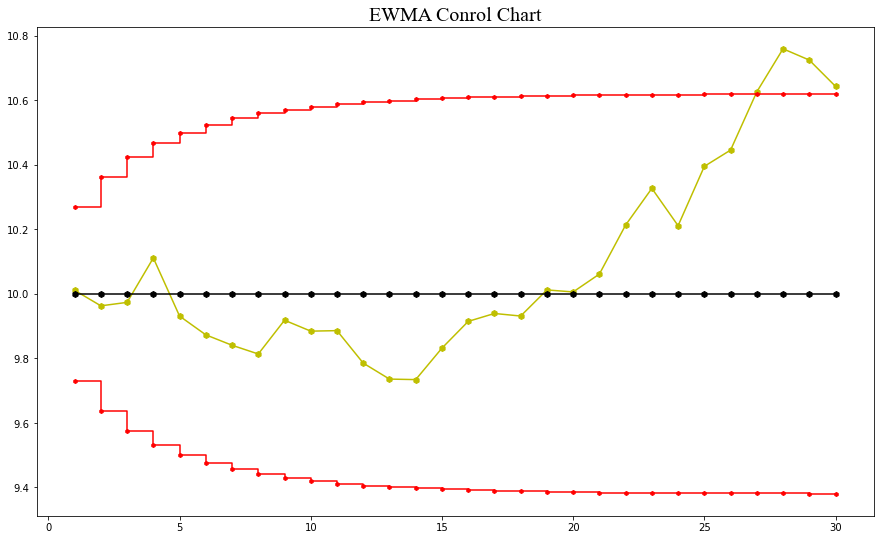

In [16]:
plt.figure(figsize=(15,9))
plt.plot(data.i,data.z, color='y', marker='h', markersize=6)
plt.plot(data.i,data.CL_ewma, color='black', marker='h', markersize=6)
plt.step(data.i,data.UCL_ewma, where='post', color='r', marker='h', markersize=4)
plt.step(data.i,data.LCL_ewma, where='post', color='r', marker='h', markersize=4)
plt.title("EWMA Conrol Chart", fontsize=20, fontname="Times New Roman")
plt.show()

##### As it is clear from the EWMA Control Chart, at the 27th sample, the out of control condition is detected.

### b) Steady state values

In [13]:
ss_ucl = []
ss_lcl = []
for i in data.i:
    temp_ss_ucl=mu0+(L*sigma*sqrt(lambdaa/((2-lambdaa)*1)))
    temp_ss_lcl=mu0-(L*sigma*sqrt(lambdaa/((2-lambdaa)*1)))
    ss_ucl.append(temp_ss_ucl)
    ss_lcl.append(temp_ss_lcl)
print(ss_ucl, '\n'*2, ss_lcl)

[10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517, 10.619422481450517] 

 [9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.380577518549483, 9.3805775185494

In [15]:
# or just:
temp_ss_ucl=mu0+(L*sigma*sqrt(lambdaa/((2-lambdaa)*1)))
temp_ss_lcl=mu0-(L*sigma*sqrt(lambdaa/((2-lambdaa)*1)))
print(temp_ss_ucl, '\n'*2, temp_ss_lcl)

10.619422481450517 

 9.380577518549483


### Moving Average

In [8]:
from statistics import mean
w=5
ma=[]
ucl_ma=[]
cl_ma=[]
lcl_ma=[]

for j in data.i:
    if j>=w:
        this_window0=data.xi[j-w:j]
        temp0=sum(this_window0)/w
        ma.append(temp0)
        ucl_ma.append(mu0+(L*sigma/sqrt(w)))
        lcl_ma.append(mu0-(L*sigma/sqrt(w)))
        
    elif j<w:
        #for s in range(1,j+1):
        this_window=data.xi[0:j]
        temp1=sum(this_window)/j
        ma.append(temp1)
        ucl_ma.append(mu0+(L*sigma/sqrt(j)))
        lcl_ma.append(mu0-(L*sigma/sqrt(j)))
data['M']=ma
data['UCL_ma']=ucl_ma
data['LCL_ma']=lcl_ma
data['CL_ma']=mu0
data

,i,xi,z,UCL_ewma,LCL_ewma,CL_ewma,M,UCL_ma,LCL_ma,CL_ma
1,1,10.11,10.011000,10.270000,9.730000,10,10.110000,12.700000,7.300000,10
2,2,9.53,9.962900,10.363248,9.636752,10,9.820000,11.909188,8.090812,10
3,3,10.07,9.973610,10.424003,9.575997,10,9.903333,11.558846,8.441154,10
4,4,11.35,10.111249,10.467462,9.532538,10,10.265000,11.350000,8.650000,10
5,5,8.31,9.931124,10.499902,9.500098,10,9.874000,11.207477,8.792523,10
6,6,9.35,9.873012,10.524710,9.475290,10,9.722000,11.207477,8.792523,10
7,7,9.55,9.840711,10.543976,9.456024,10,9.726000,11.207477,8.792523,10
8,8,9.57,9.813639,10.559095,9.440905,10,9.626000,11.207477,8.792523,10
9,9,10.86,9.918276,10.571048,9.428952,10,9.528000,11.207477,8.792523,10
10,10,9.58,9.884448,10.580549,9.419451,10,9.782000,11.207477,8.792523,10


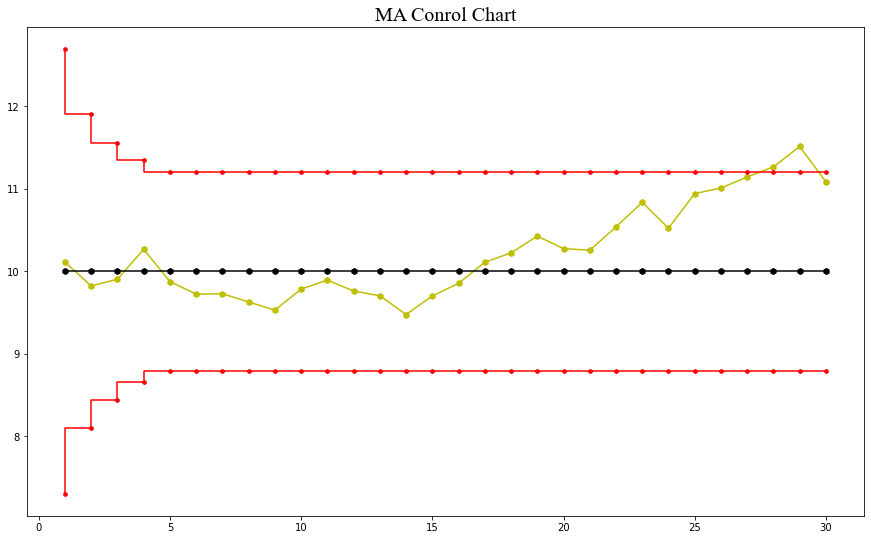

In [17]:
plt.figure(figsize=(15,9))
plt.title("MA Conrol Chart", fontsize=20, fontname="Times New Roman")
plt.plot(data.i,data.M, color='y', marker='h', markersize=6)
plt.plot(data.i,data.CL_ma, color='black', marker='h', markersize=6)
plt.step(data.i,data.UCL_ma, where='pre', color='r', marker='h', markersize=4)
plt.step(data.i,data.LCL_ma, where='pre', color='r', marker='h', markersize=4)
plt.show()

##### As it is clear from the MA Control Chart, at the 28th sample, the out of control condition is detected.